In [2]:
import numpy as np
from Utils.loginterp import loginterp

from scipy.optimize import curve_fit

import time
import sys

from matplotlib import pyplot as plt

In [5]:
import sys
sys.path.append('../nbody/')

sim_dir = '../nbody/ANL/data/'

from cosmo import Cosmology

cosmo = Cosmology(dir=sim_dir)

In [6]:
##### set plot params ######
SMALL_SIZE = 8
BIGGER_SIZE = 12
BIGGEST_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [7]:
from EPT.ept_fftw import EPT

In [8]:
k, p = np.loadtxt('../velocity_moments/ir_resum/ANL15_matterpower_nowiggle.dat').T

In [10]:
# First do the Power Spectrum:
zeldas = []


t1 = time.time()
zeldas += [EPT(k, cosmo.iDz(0.8)**2 * p, beyond_gauss = True, one_loop= True, third_order=True,\
                import_wisdom=False, cutoff=20, extrap_min = -5, extrap_max = 3, N = 2000, threads=1),]
t2 = time.time()
print(t2-t1)

0.26923704147338867


In [11]:
# Test the Power Spectrum

In [13]:
xi0_spt = np.loadtxt('../velocity_moments/zvonimir/xi_0_oneloop_nowiggle_z0.dat')
kzv = xi0_spt[:,0]; plzv = xi0_spt[:,1]

In [14]:
D = cosmo.iDz(0.8); f = cosmo.f(0.8)

plin = (plzv)*D**2
pb1sq = (xi0_spt[:,2] + xi0_spt[:,8])*D**4
pb1b2 = xi0_spt[:,3] * D**4
pb1bs = xi0_spt[:,4] * D**4
pb2sq = xi0_spt[:,5] * D**4
pb2bs = xi0_spt[:,6] * D**4
pbsbs = xi0_spt[:,7] * D**4
pb1b3 = xi0_spt[:,9] * D**4

terms = [r'$b_1^2$',r'$b_1 b_2$',r'$b_1 b_s$',r'$b_2^2$',r'$b_2 b_s$',r'$b_s^2$',r'$b_1 b_3$']
zvs   = [plin + pb1sq, pb1b2, pb1bs, pb2sq, pb2bs, pbsbs, 0.435*pb1b3]
sns   = [0,0,0,1,1,1,0]

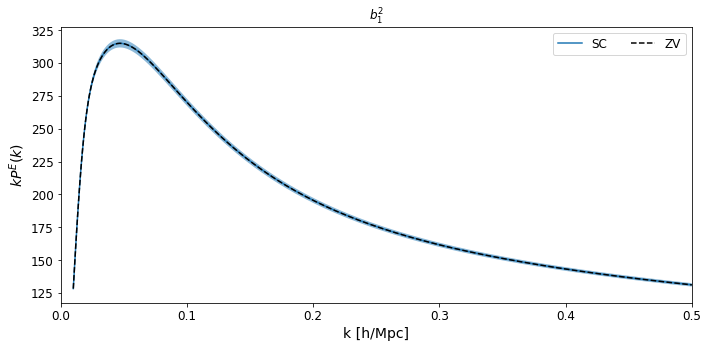

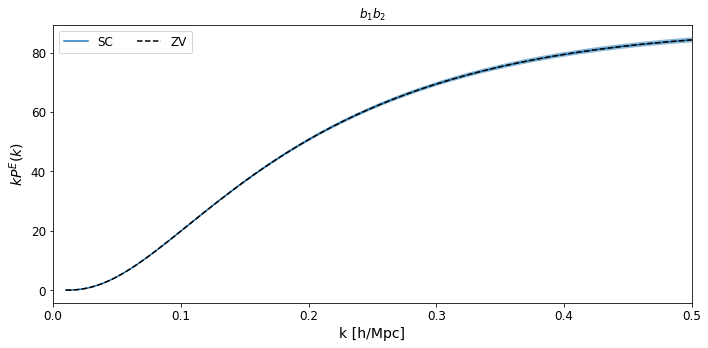

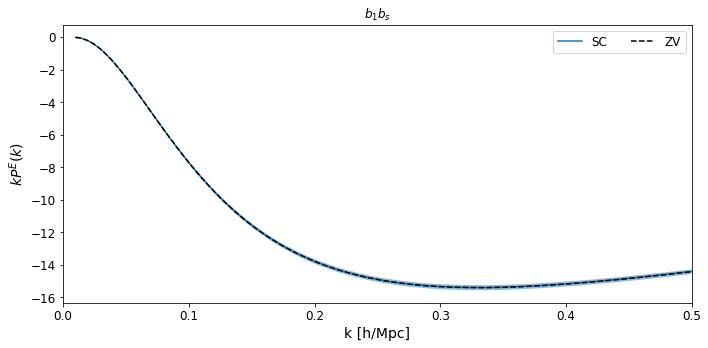

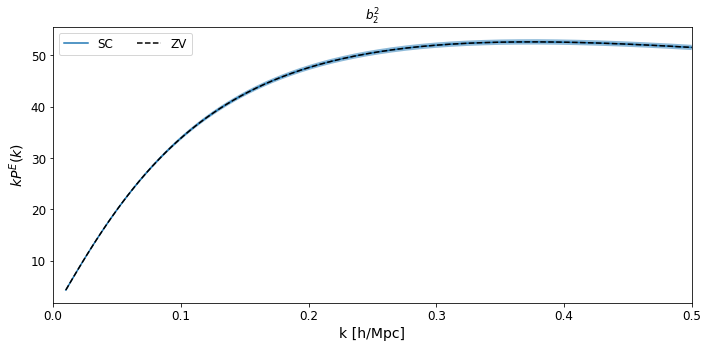

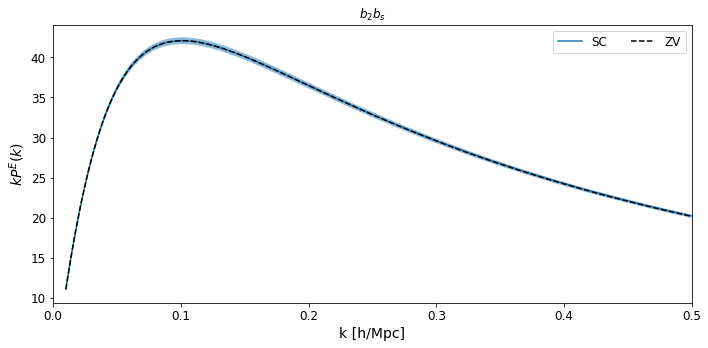

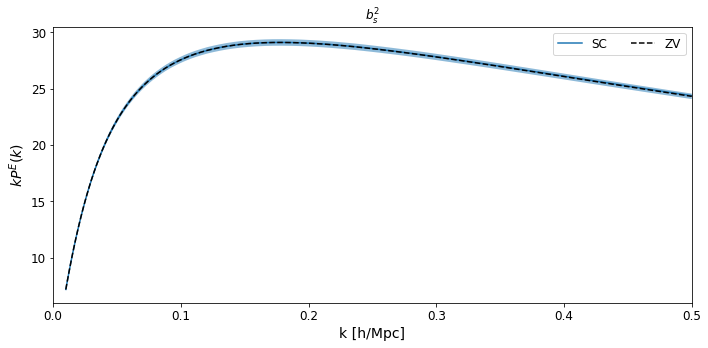

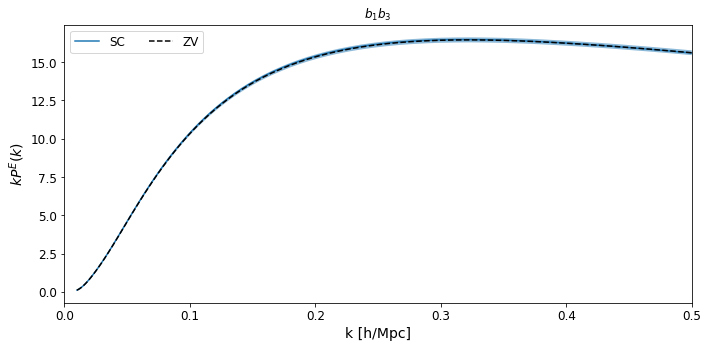

In [16]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**1 * zelda.pktable_ept[:,jj+1],label='SC')

    sn = sns[jj] * np.median( np.interp(kzv, zelda.pktable_ept[:,0], zeldas[0].pktable_ept[:,jj+1]) - zvs[jj] )
    plt.plot(kzv,  kzv*(zvs[jj] + sn), 'k--',label='ZV')
    plt.fill_between(kzv, 0.99*(kzv*(zvs[jj] + sn)), 1.01*(kzv*(zvs[jj] + sn)), alpha=0.5)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k P^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [17]:
# First Moment:
xi1_spt = np.loadtxt('../velocity_moments/zvonimir/xi_1_oneloop_nowigg_z0.dat')
plin = (2*plzv)*D**2
pb1 = (xi1_spt[:,2] + xi1_spt[:,8])*D**4
pb1sq = (xi1_spt[:,5] + xi1_spt[:,10])*D**4
pb2 = xi1_spt[:,3] * D**4
pb1b2 = xi1_spt[:,6] * D**4
pbs = xi1_spt[:,4] * D**4
pb1bs = xi1_spt[:,7] * D**4
pb3 = xi1_spt[:,9] * D**4

terms = [r'$b_1$',r'$b_1^2$',r'$b_2$',r'$b_1 b_2$', r'$b_s$', r'$b_1 b_s$', r'$b_3$',]
zvs = [plin + pb1, pb1sq, pb2, pb1b2, pbs, pb1bs, 0.434*pb3]

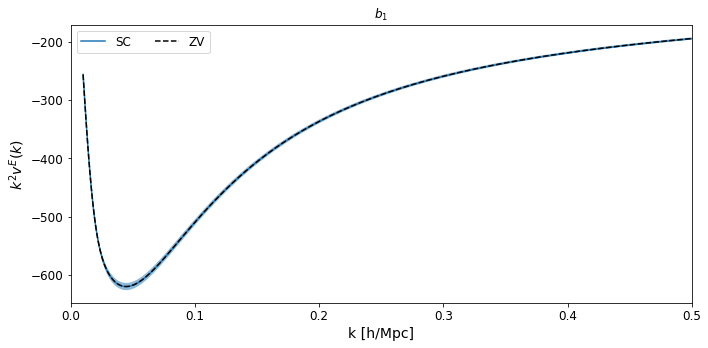

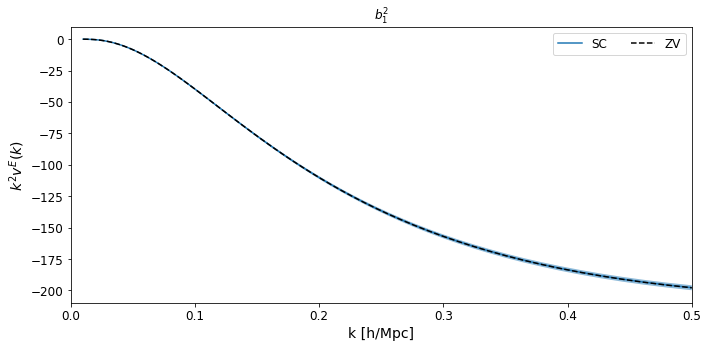

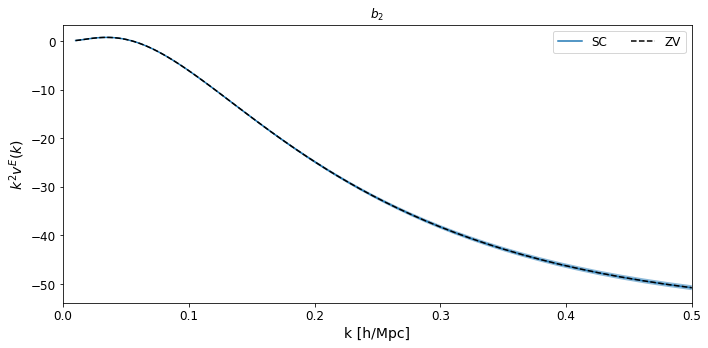

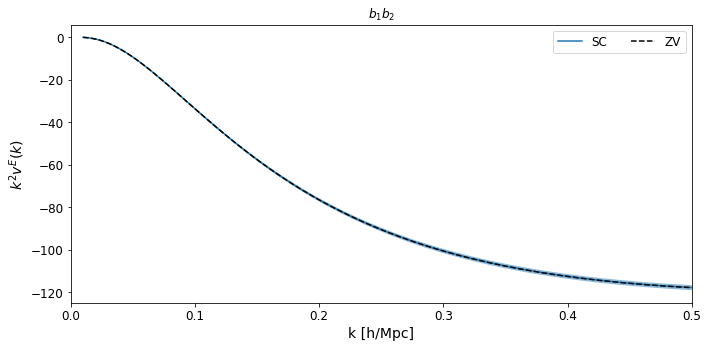

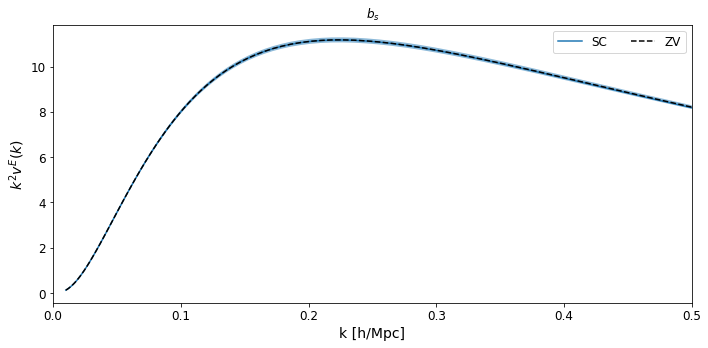

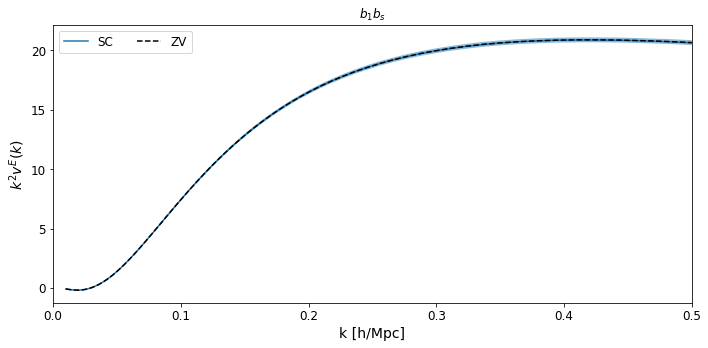

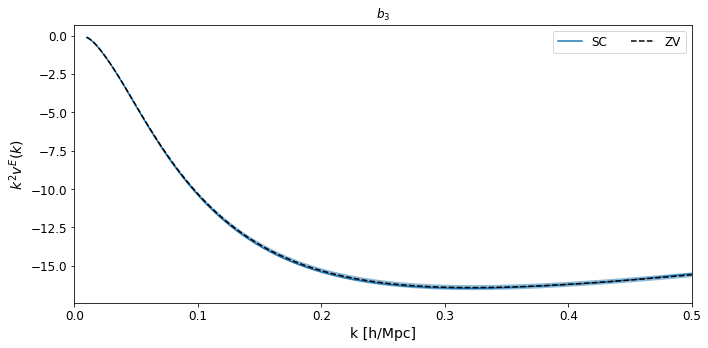

In [18]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**2 * zelda.vktable_ept[:,jj+1],label='SC')

    plt.plot(kzv,  -kzv*(zvs[jj]), 'k--',label='ZV')
    plt.fill_between(kzv, -0.99*(kzv*(zvs[jj] + sn)), -1.01*(kzv*(zvs[jj] + sn)), alpha=0.5)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^2 v^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./ept_lpt_comparison_matter_nw.pdf')


    plt.show()

In [19]:
# # Finally, sigma(k)
xi20_spt = np.loadtxt('../velocity_moments/zvonimir/xi_2_oneloop_nowigg_pownu2_z0.dat')
xi24_spt = np.loadtxt('../velocity_moments/zvonimir/xi_2_oneloop_nowigg_pownu4_z0.dat')

In [20]:
# Quadrupole First
s2lin = (plzv)*D**2
s2loop = (xi24_spt[:,2] + xi24_spt[:,7])*D**4
s2b1 = (xi24_spt[:,3] + xi24_spt[:,8])*D**4
s2b1sq = (xi24_spt[:,6] + xi24_spt[:,9])*D**4
s2b2 = (xi24_spt[:,4])*D**4
s2bs = (xi24_spt[:,5])*D**4
s2ct = kzv**2 * plzv

zvs = [s2lin + s2loop, s2b1, s2b1sq, s2b2, s2bs]
terms = ['1',r'$b_1$',r'$b_1^2$',r'$b_2$',r'$b_s$']

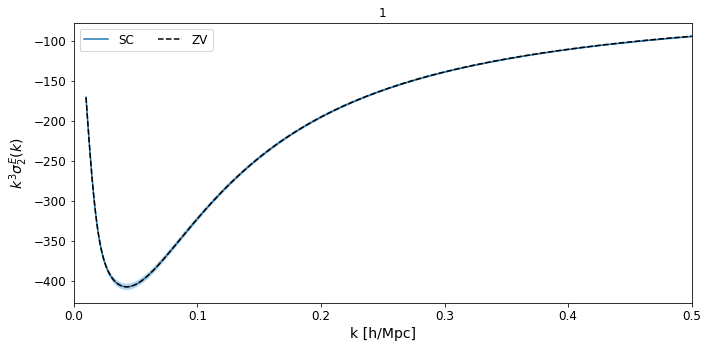

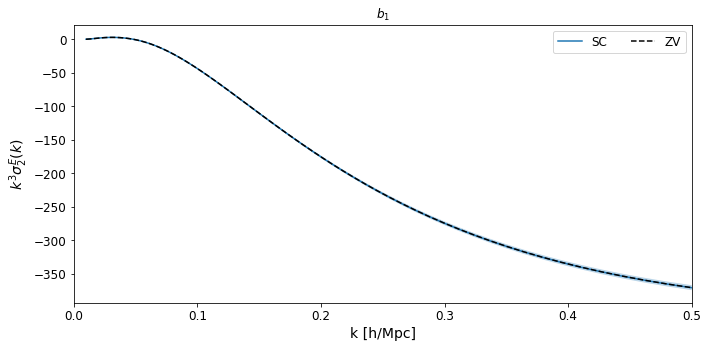

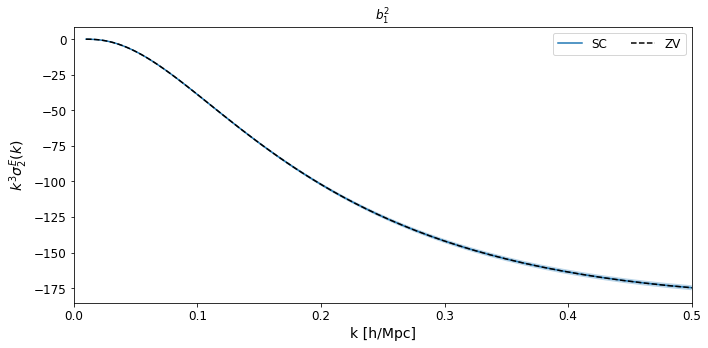

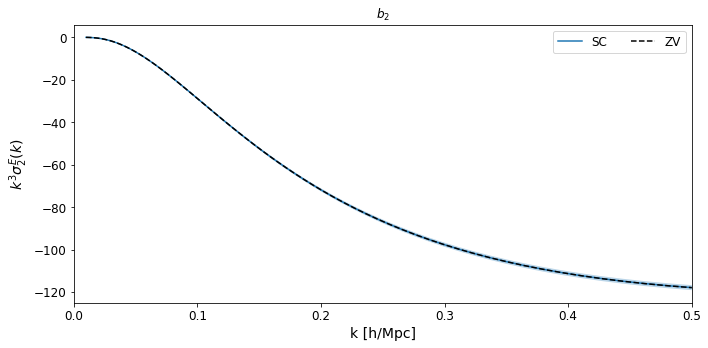

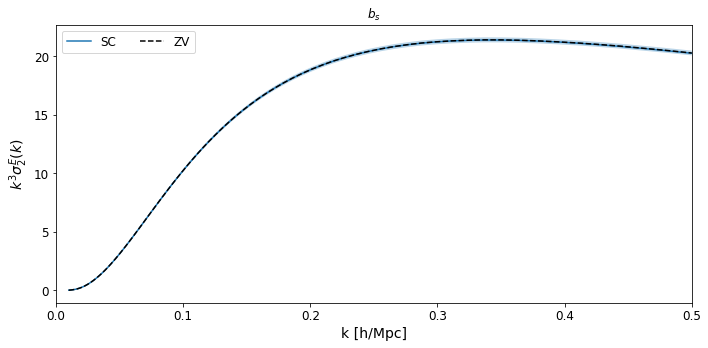

In [23]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**3 * zelda.s2ktable_ept[:,jj+1],label='SC')

    plt.plot(kzv,  -4./3*kzv*(zvs[jj]), 'k--',label='ZV')
    plt.fill_between(kzv, -4./3*0.99*(kzv*(zvs[jj] + sn)), -4./3*1.01*(kzv*(zvs[jj] + sn)), alpha=0.3)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^3 \sigma_2^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [29]:
# Now the monopole:
s2lin = (plzv/3)*D**2
s2loop = (xi20_spt[:,2] + xi20_spt[:,7])*D**4 + 1./3*(xi24_spt[:,2] + xi24_spt[:,7])*D**4
s2b1 = (xi20_spt[:,3] + xi20_spt[:,8])*D**4 + 1./3*(xi24_spt[:,3] + xi24_spt[:,8])*D**4
s2b1sq = (xi20_spt[:,6] + xi20_spt[:,9])*D**4 + 1./3*(xi24_spt[:,6] + xi24_spt[:,9])*D**4
s2b2 = (xi20_spt[:,4])*D**4 + 1./3*(xi24_spt[:,4])*D**4
s2bs = (xi20_spt[:,5])*D**4 + 1./3*(xi24_spt[:,5])*D**4

zvs = [s2lin + s2loop, s2b1, s2b1sq, s2b2, s2bs]
terms = ['1',r'$b_1$',r'$b_1^2$',r'$b_2$',r'$b_s$']

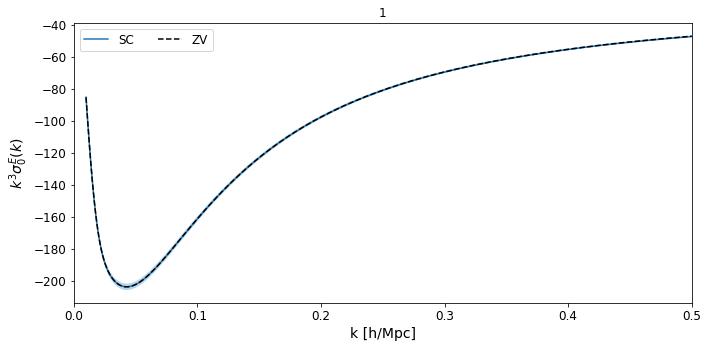

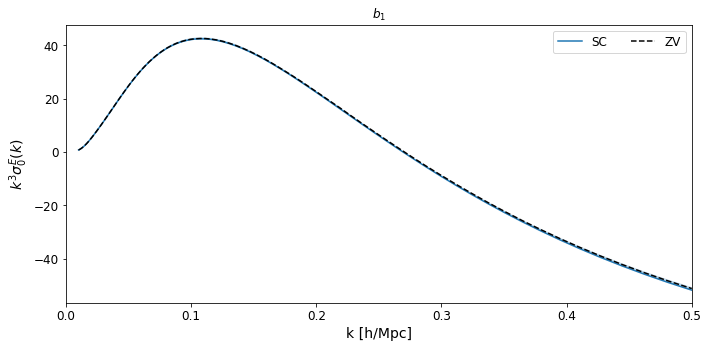

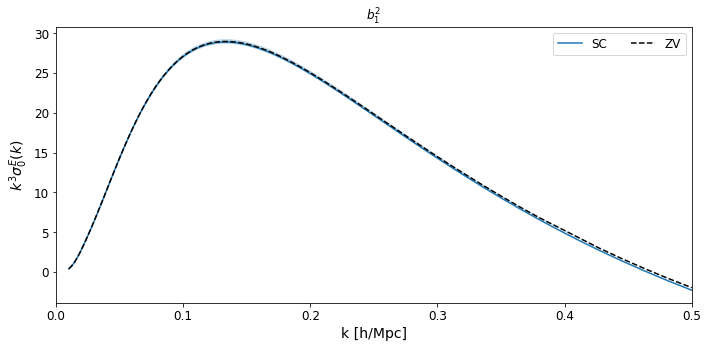

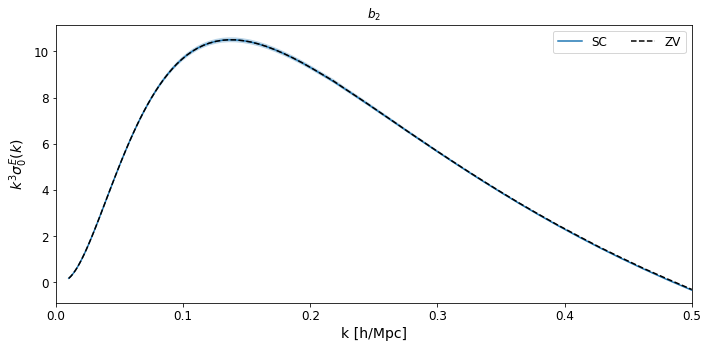

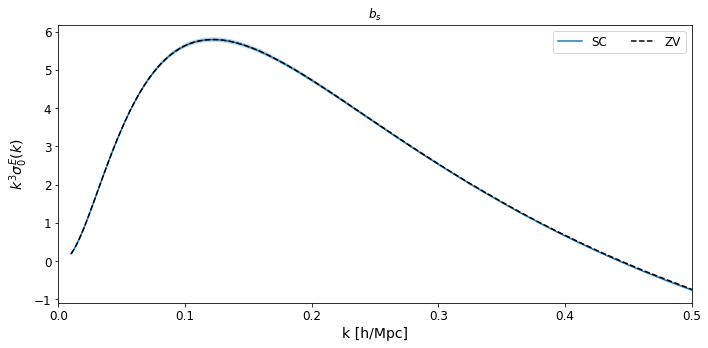

In [30]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**3 * zelda.s0ktable_ept[:,jj+1],label='SC')

    plt.plot(kzv,  -2*kzv*(zvs[jj]), 'k--',label='ZV')
    plt.fill_between(kzv, -2*0.99*(kzv*(zvs[jj] + sn)), -2*1.01*(kzv*(zvs[jj] + sn)), alpha=0.3)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^3 \sigma_0^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [31]:
# What's going on with the b_1^2 term?

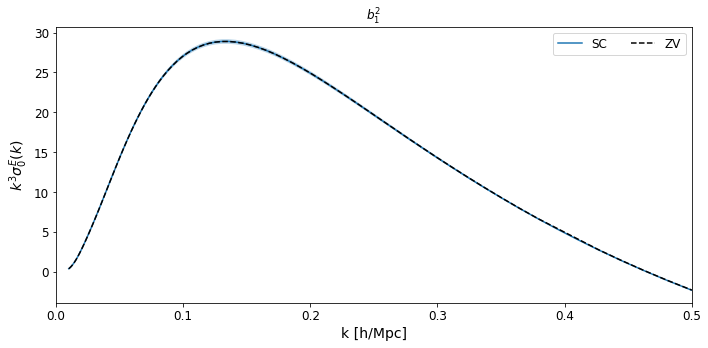

In [32]:
for jj, term in [ (2, r'$b_1^2$')  ]:
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**3 * zelda.s0ktable_ept[:,jj+1],label='SC')

    sn =  0.3
    plt.plot(kzv,  -2*kzv*(zvs[jj]+sn), 'k--',label='ZV')
    plt.fill_between(kzv, -2*0.99*(kzv*(zvs[jj] + sn)), -2*1.01*(kzv*(zvs[jj]+sn )), alpha=0.3)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^3 \sigma_0^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [34]:
# Now do the third moment:
xi3_ept = np.loadtxt('../velocity_moments/zvonimir/xi_3_oneloop_nowigg_pownu4_z0.dat')
xi3_1 = (xi3_ept[:,2] + xi3_ept[:,4]) * D**4
xi3_b1 = (xi3_ept[:,3] + xi3_ept[:,5]) * D**4

In [35]:
zvs = [xi3_1, xi3_b1]
terms = ['1',r'$b_1$']

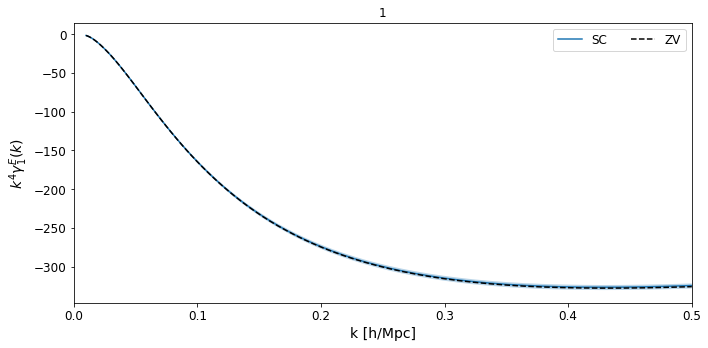

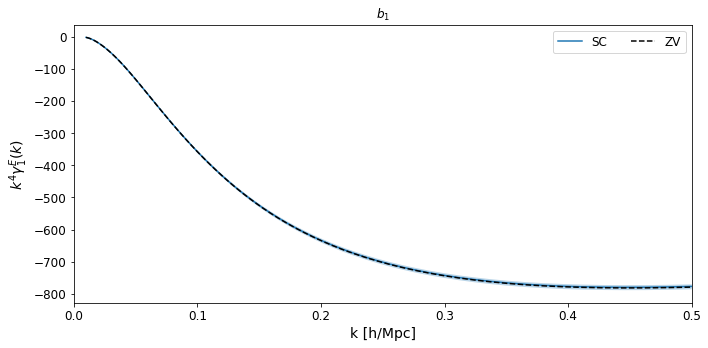

In [36]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**4 * zelda.g1ktable_ept[:,jj+1],label='SC')
        #plt.plot(zelda.pktable_spt[:,0], zelda.pktable_spt[:,0]**4 * zelda.g1[:,2],label=label)

        
    plt.plot(kzv,  6*kzv*(zvs[jj]), 'k--',label='ZV')
    plt.fill_between(kzv, 6*0.99*(kzv*(zvs[jj] + sn)), 6*1.01*(kzv*(zvs[jj] + sn)), alpha=0.3)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^4 \gamma_1^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [38]:
# Now do the third moment:
xi3_spt = np.loadtxt('../velocity_moments/zvonimir/xi_3_oneloop_nowigg_pownu6_z0.dat')
xi3_1 = (xi3_spt[:,2] + xi3_spt[:,4]) * D**4
xi3_b1 = (xi3_spt[:,3] + xi3_spt[:,5]) * D**4

zvs = [xi3_1, xi3_b1]
terms = ['1',r'$b_1$']

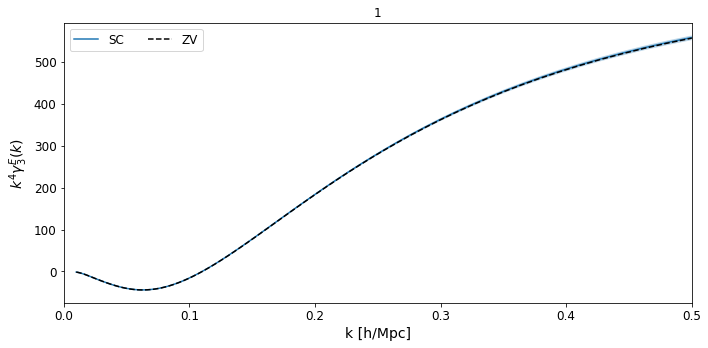

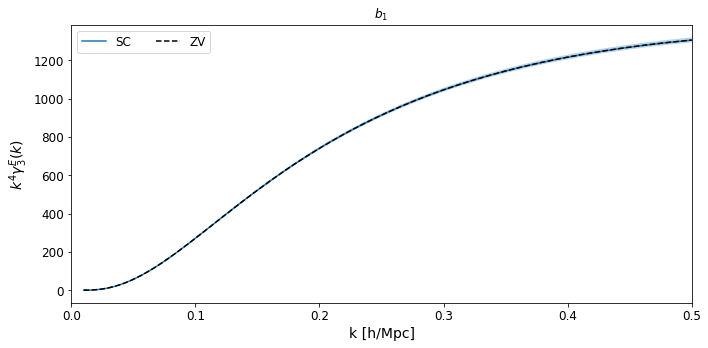

In [39]:
for jj, term in enumerate(terms):
    
    plt.figure(figsize=(10,5))

    for ii, zelda in enumerate(zeldas):
        plt.plot(zelda.pktable_ept[:,0], zelda.pktable_ept[:,0]**4 * zelda.g3ktable_ept[:,jj+1],label='SC')
        #plt.plot(zelda.pktable_spt[:,0], zelda.pktable_spt[:,0]**4 * zelda.g3[:,2],label=label)

        
    plt.plot(kzv,  6*kzv*(zvs[jj]), 'k--',label='ZV')
    plt.fill_between(kzv, 6*0.99*(kzv*(zvs[jj] + sn)), 6*1.01*(kzv*(zvs[jj] + sn)), alpha=0.3)
    plt.xlim(0,0.5)
    #plt.ylim(120,325)

    plt.xlabel('k [h/Mpc]')
    plt.ylabel(r'$k^4 \gamma_3^E(k)$')
    plt.legend(ncol=2)
    plt.title(term)
    plt.tight_layout()

    #plt.savefig('./spt_lpt_comparison_matter_nw.pdf')


    plt.show()

In [ ]:
# Finally, the fourth moment:

In [40]:
# Import Zvonimir's file, mu^4
xi4_spt = np.loadtxt('../velocity_moments/zvonimir/xi_4_oneloop_nowigg_pownu4_z0.dat')

kzv = xi4_spt[:,0]
xi4_spt = (xi4_spt[:,2] + xi4_spt[:,3])*D**4

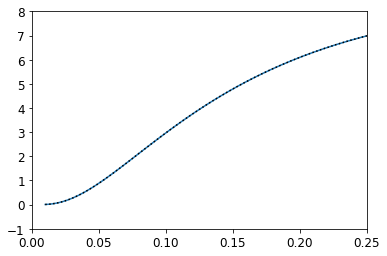

In [41]:
plt.plot(kzv, kzv*xi4_spt)
plt.plot(zelda.kv, zelda.kv**5*zeldas[0].k0/24, 'k:' )

plt.xlim(0,0.25)
plt.ylim(-1,8)

plt.show()

In [43]:
# Import Zvonimir's file, mu^6
xi4_spt = np.loadtxt('../velocity_moments/zvonimir/xi_4_oneloop_nowigg_pownu6_z0.dat')

kzv = xi4_spt[:,0]
xi4_spt = (xi4_spt[:,2] + xi4_spt[:,3])*D**4

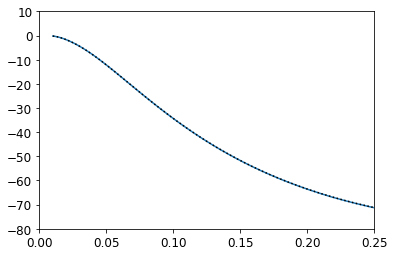

In [44]:
plt.plot(kzv, kzv*xi4_spt)
plt.plot(zelda.kv, zelda.kv**5*zeldas[0].k2/24, 'k:' )

plt.xlim(0,0.25)
plt.ylim(-80,10)

plt.show()

In [45]:
# Import Zvonimir's file, mu^8
xi4_spt = np.loadtxt('../velocity_moments/zvonimir/xi_4_oneloop_nowigg_pownu8_z0.dat')

kzv = xi4_spt[:,0]
xi4_spt = (xi4_spt[:,2] + xi4_spt[:,3])*cosmo.iDz(0.8)**4

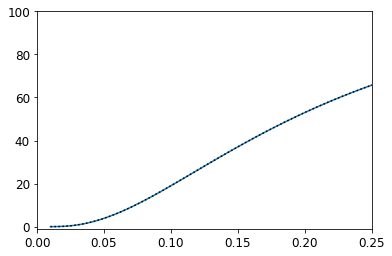

In [46]:
plt.plot(kzv, kzv*xi4_spt)
plt.plot(zelda.kv, zelda.kv**5*zeldas[0].k4/24, 'k:' )

plt.xlim(0,0.25)
plt.ylim(-1,100)

plt.show()